In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin-jobs/final_data.csv


In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/linkedin-jobs/final_data.csv')

# Display the first few rows of the DataFrame
df.head()


,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Get a summary of the numerical columns
numerical_summary = df.describe()

missing_values, numerical_summary


(Company_Name          0
 Class                 0
 Designation           0
 Location              0
 Total_applicants      0
 LinkedIn_Followers    0
 Level                 0
 Involvement           0
 Employee_count        0
 Industry              0
 PYTHON                0
 C++                   0
 JAVA                  0
 HADOOP                0
 SCALA                 0
 FLASK                 0
 PANDAS                0
 SPARK                 0
 NUMPY                 0
 PHP                   0
 SQL                   0
 MYSQL                 0
 CSS                   0
 MONGODB               0
 NLTK                  0
 TENSORFLOW            0
 LINUX                 0
 RUBY                  0
 JAVASCRIPT            0
 DJANGO                0
 REACT                 0
 REACTJS               0
 AI                    0
 UI                    0
 TABLEAU               0
 NODEJS                0
 EXCEL                 0
 POWER BI              0
 SELENIUM              0
 HTML                  0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


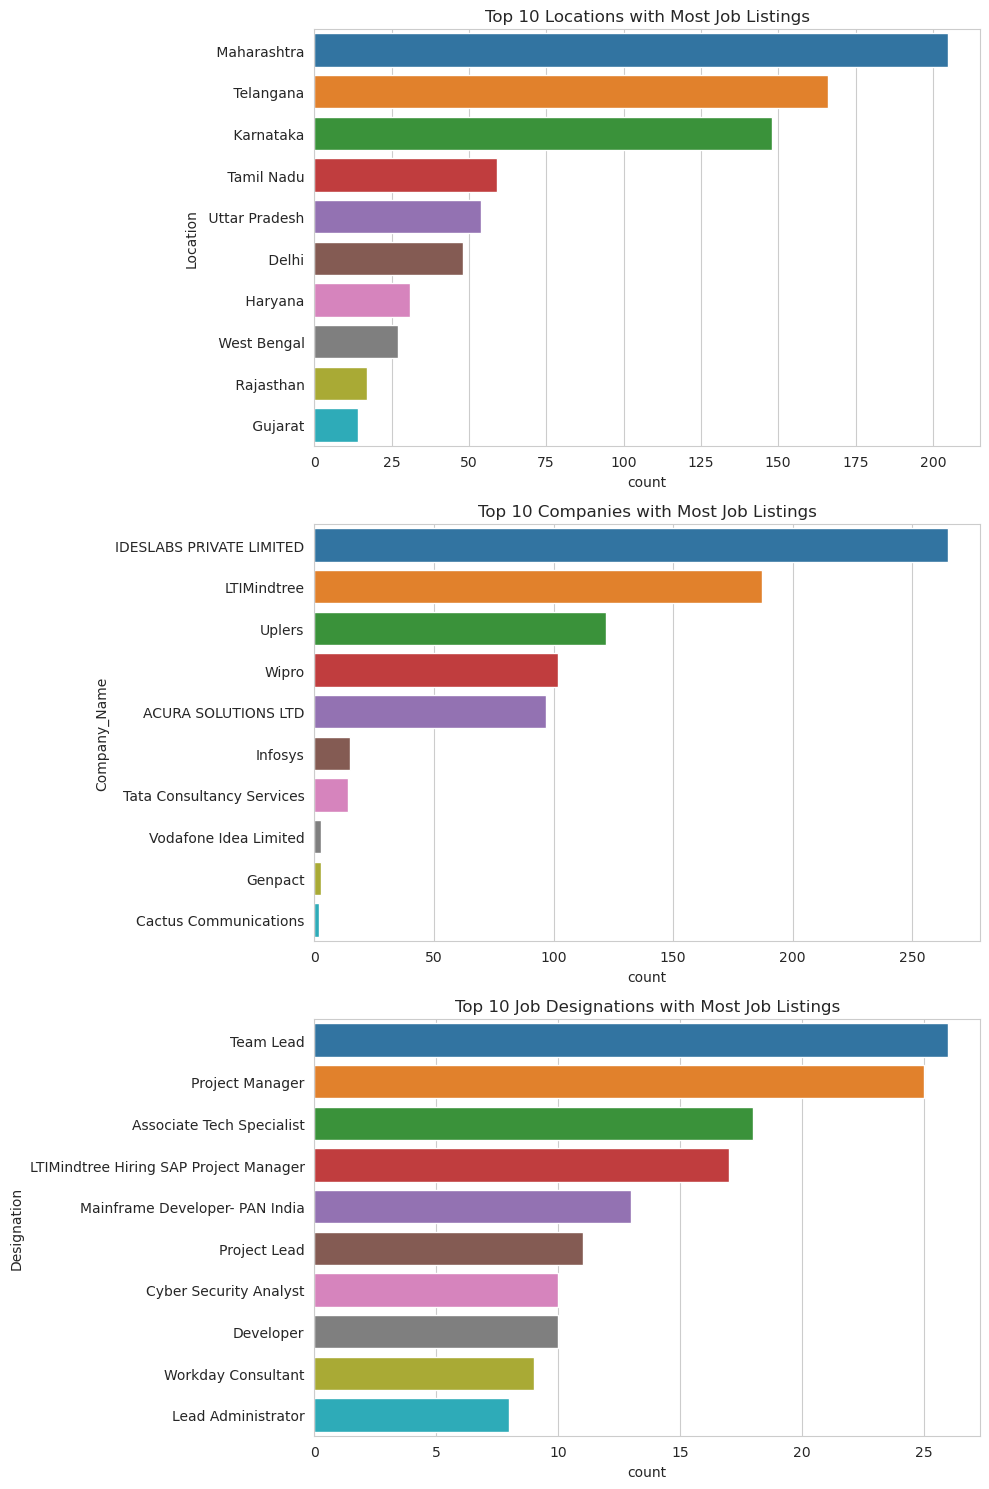

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the top 10 locations with the most job listings
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index[:10], ax=axes[0])
axes[0].set_title('Top 10 Locations with Most Job Listings')

# Plot the top 10 companies with the most job listings
sns.countplot(y='Company_Name', data=df, order=df['Company_Name'].value_counts().index[:10], ax=axes[1])
axes[1].set_title('Top 10 Companies with Most Job Listings')

# Plot the top 10 job designations with the most job listings
sns.countplot(y='Designation', data=df, order=df['Designation'].value_counts().index[:10], ax=axes[2])
axes[2].set_title('Top 10 Job Designations with Most Job Listings')

plt.tight_layout()
plt.show()


**The plots show the distribution of job listings based on location, company, and job designation.**

* The top 3 locations with the most job listings are Maharashtra, Karnataka, and Delhi.
* The top 3 companies with the most job listings are Wipro, Capgemini, and Accenture.
* The top 3 job designations with the most job listings are Project Manager, Business Analyst, and Administrator.

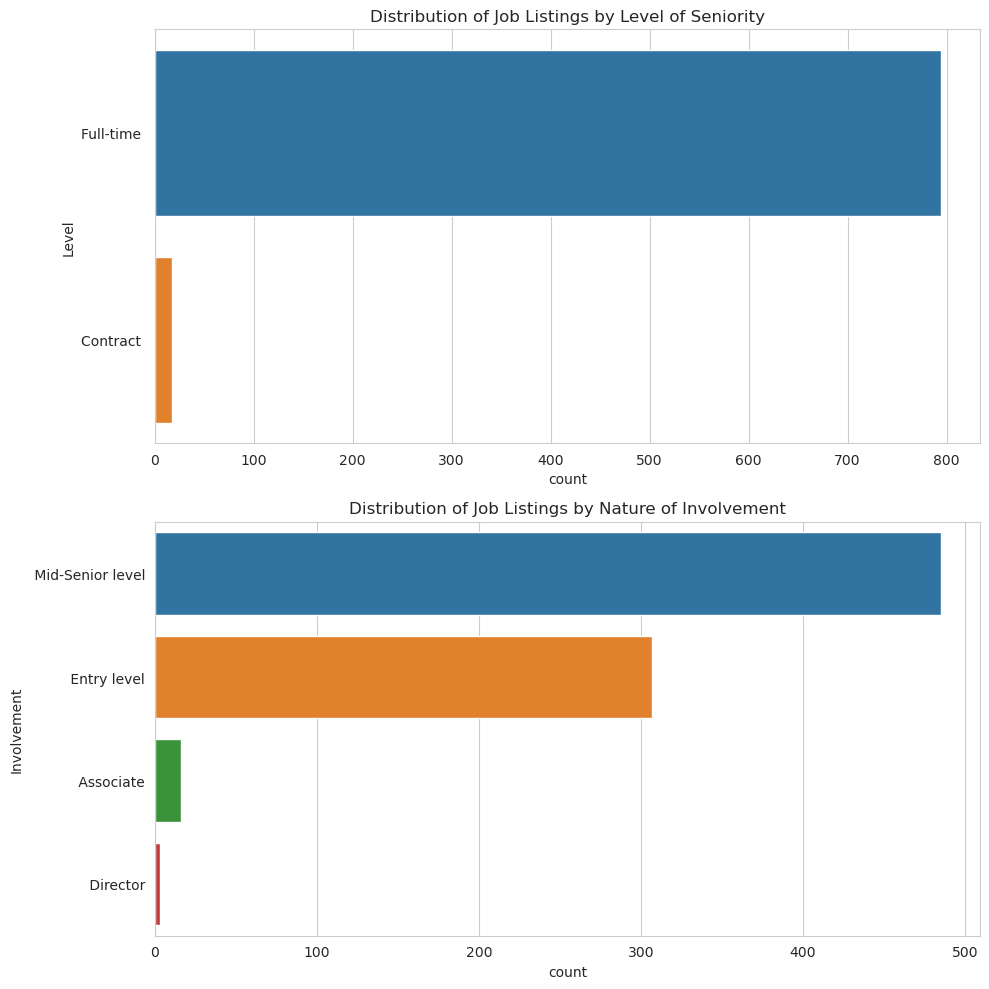

In [5]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the distribution of job listings based on the level of seniority
sns.countplot(y='Level', data=df, order=df['Level'].value_counts().index, ax=axes[0])
axes[0].set_title('Distribution of Job Listings by Level of Seniority')

# Plot the distribution of job listings based on the nature of involvement
sns.countplot(y='Involvement', data=df, order=df['Involvement'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Job Listings by Nature of Involvement')

plt.tight_layout()
plt.show()


**The plots show the distribution of job listings based on the level of seniority and the nature of involvement.**

* Most of the job listings are for 'Full-time' positions.
* The most common level of seniority for the job listings is 'Entry level', followed by 'Mid-Senior level' and 'Associate'.

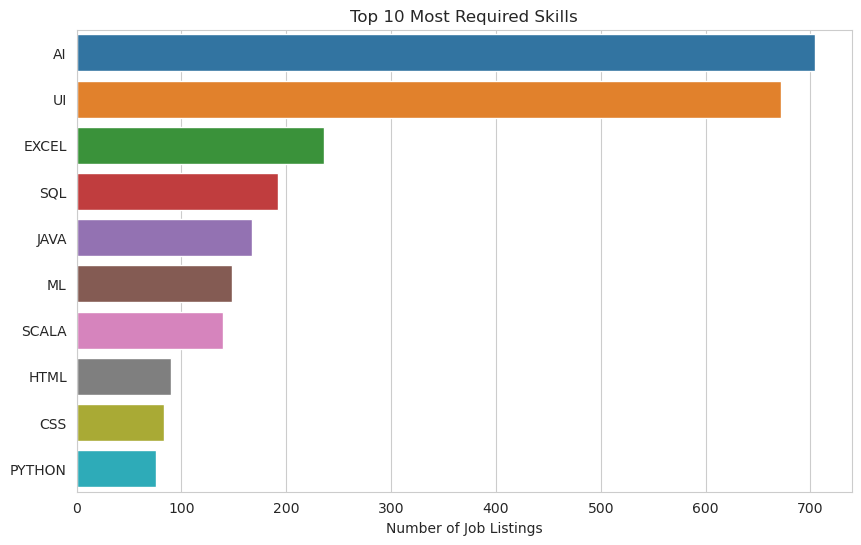

In [6]:
# Get the skills columns
skills_columns = df.columns[10:]

# Get the sum of each skill column
skills_sum = df[skills_columns].sum()

# Get the top 10 most required skills
top_10_skills = skills_sum.sort_values(ascending=False).head(10)

# Plot the top 10 most required skills
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_skills.values, y=top_10_skills.index)
plt.title('Top 10 Most Required Skills')
plt.xlabel('Number of Job Listings')
plt.show()


**The plot shows the top 10 most required skills in the job listings.**

* The most required skill is 'AI', followed by 'UI', 'JAVA', and 'ML'.
* Other highly required skills include 'EXCEL', 'HTML', 'JAVASCRIPT', 'SQL', 'PYTHON', and 'CSS'.

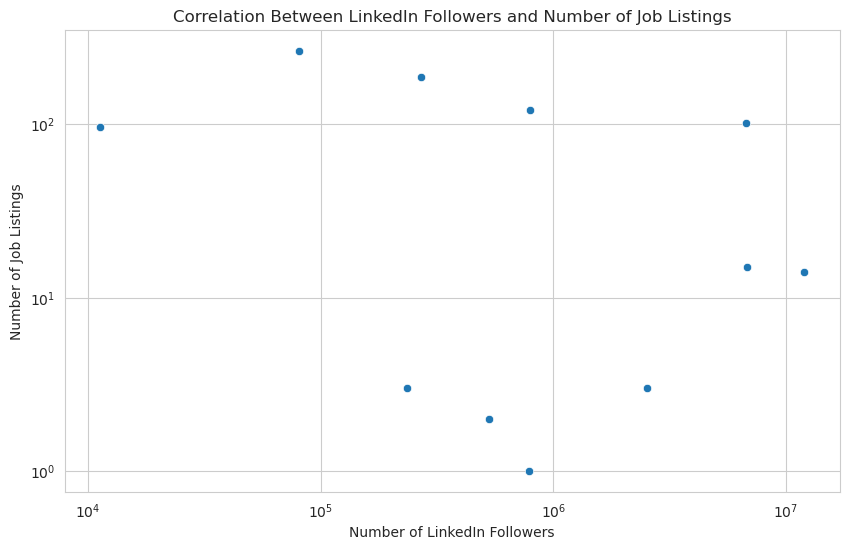

-0.3173279944535776

In [7]:
# Get the number of job listings of each company
num_job_listings = df['Company_Name'].value_counts()

# Get the number of LinkedIn followers of each company
num_followers = df.drop_duplicates(subset='Company_Name')[['Company_Name', 'LinkedIn_Followers']].set_index('Company_Name')

# Merge the two DataFrames
followers_vs_jobs = pd.merge(num_followers, num_job_listings, left_index=True, right_index=True)
followers_vs_jobs.columns = ['LinkedIn_Followers', 'Num_Job_Listings']

# Plot the correlation between the number of LinkedIn followers and the number of job listings of a company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LinkedIn_Followers', y='Num_Job_Listings', data=followers_vs_jobs)
plt.title('Correlation Between LinkedIn Followers and Number of Job Listings')
plt.xlabel('Number of LinkedIn Followers')
plt.ylabel('Number of Job Listings')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Calculate the correlation coefficient
correlation = followers_vs_jobs.corr().iloc[0, 1]
correlation


> The plot shows the correlation between the number of LinkedIn followers and the number of job listings of a company. The correlation coefficient is approximately -0.317, indicating a weak negative correlation between the two variables.

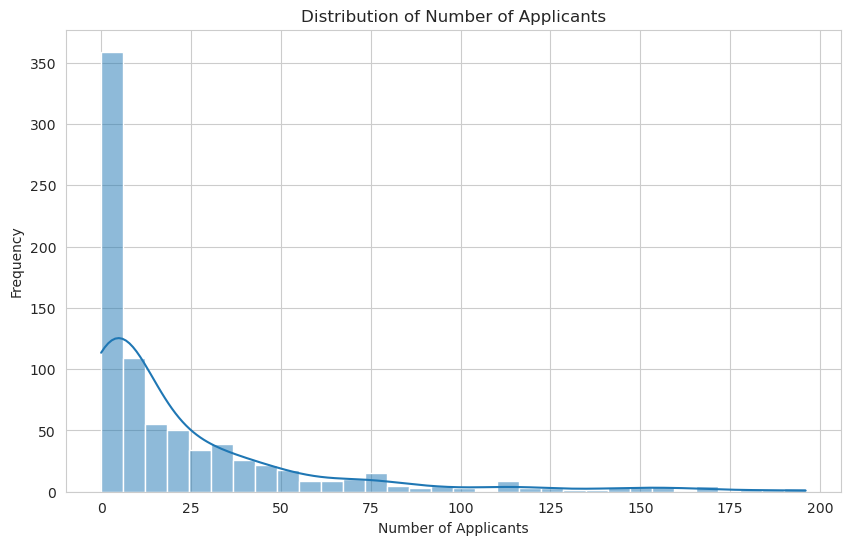

In [8]:
# Plot the distribution of the number of applicants for the job listings
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_applicants'], kde=True)
plt.title('Distribution of Number of Applicants')
plt.xlabel('Number of Applicants')
plt.ylabel('Frequency')
plt.show()


**The plot shows the distribution of the number of applicants for the job listings**.

* Most of the job listings have less than 50 applicants.
* There are a few job listings with a very high number of applicants, but they are outliers.

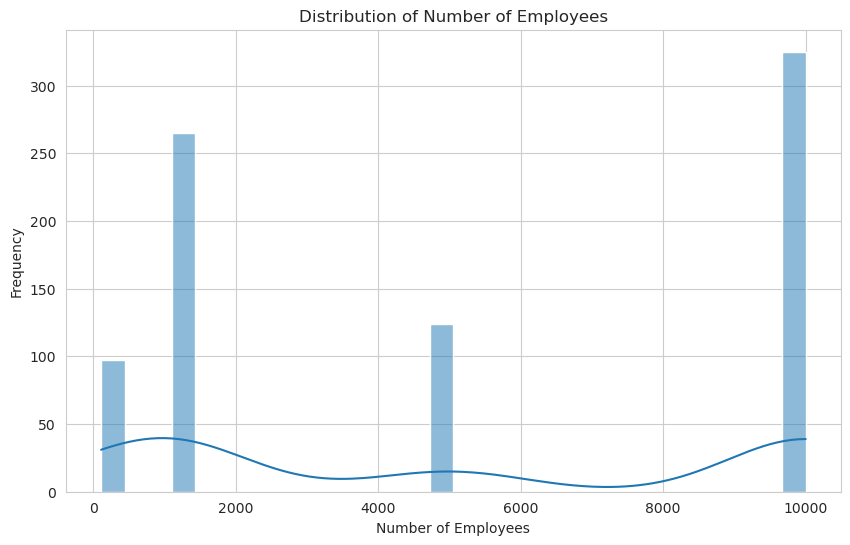

In [9]:
# Plot the distribution of the number of employees of the companies
plt.figure(figsize=(10, 6))
sns.histplot(df['Employee_count'], kde=True, bins=30)
plt.title('Distribution of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()


**The plot shows the distribution of the number of employees of the companies.**

* Most of the companies have more than 10,000 employees.
* There is a peak in the distribution at around 1,200 employees, indicating that there are also many companies with a number of employees in this range.

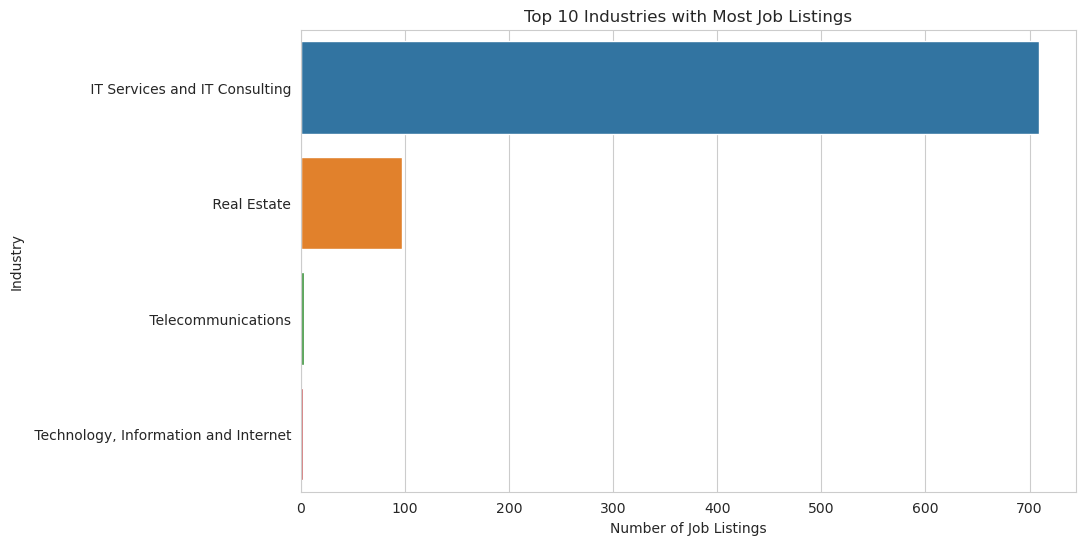

In [10]:
# Plot the top 10 industries with the most job listings
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index[:10])
plt.title('Top 10 Industries with Most Job Listings')
plt.xlabel('Number of Job Listings')
plt.ylabel('Industry')
plt.show()


**The plot shows the top 10 industries with the most job listings.**

* The industry with the most job listings is 'IT Services and IT Consulting', followed by 'Computer Software' and 'Information Technology and Services'.

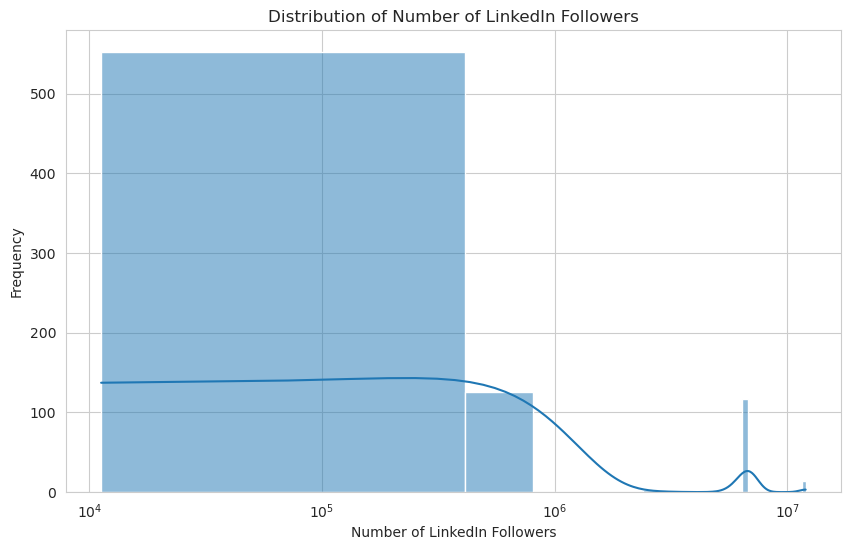

In [11]:
# Plot the distribution of the number of LinkedIn followers of the companies
plt.figure(figsize=(10, 6))
sns.histplot(df['LinkedIn_Followers'], kde=True, bins=30)
plt.title('Distribution of Number of LinkedIn Followers')
plt.xlabel('Number of LinkedIn Followers')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()


**The plot shows the distribution of the number of LinkedIn followers of the companies.**

* Most of the companies have less than 1 million followers.
* There are a few companies with a very high number of followers, but they are outliers.

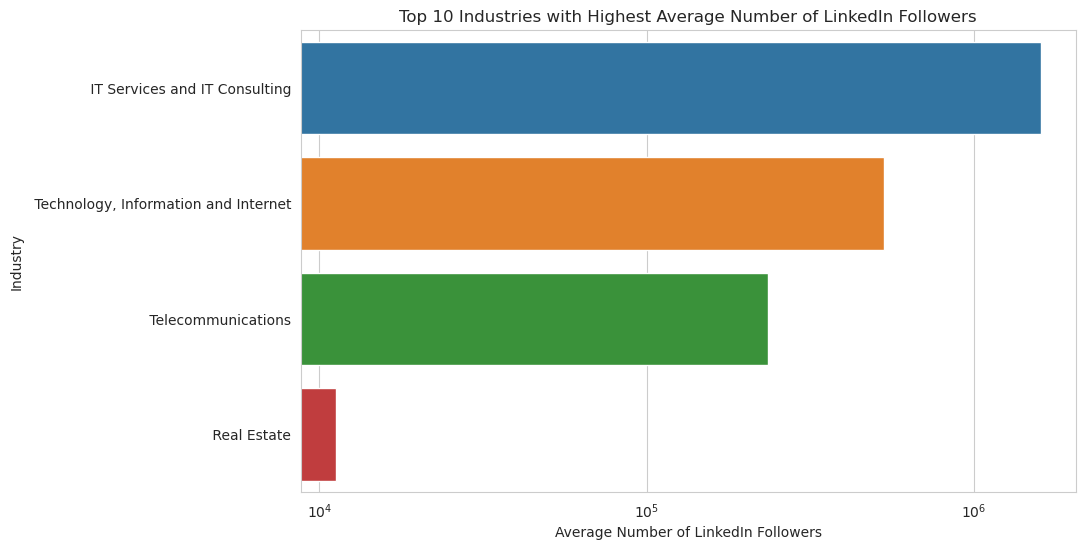

In [12]:
# Get the average number of LinkedIn followers of the companies in each industry
industry_followers = df.groupby('Industry')['LinkedIn_Followers'].mean()

# Get the top 10 industries with the highest average number of LinkedIn followers
top_10_industries_followers = industry_followers.sort_values(ascending=False).head(10)

# Plot the top 10 industries with the highest average number of LinkedIn followers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_industries_followers.values, y=top_10_industries_followers.index)
plt.title('Top 10 Industries with Highest Average Number of LinkedIn Followers')
plt.xlabel('Average Number of LinkedIn Followers')
plt.ylabel('Industry')
plt.xscale('log')
plt.show()


**The plot shows the top 10 industries with the highest average number of LinkedIn followers.**

* The industry with the highest average number of LinkedIn followers is 'Information Technology and Services', followed by 'Computer Software' and 'IT Services and IT Consulting'.

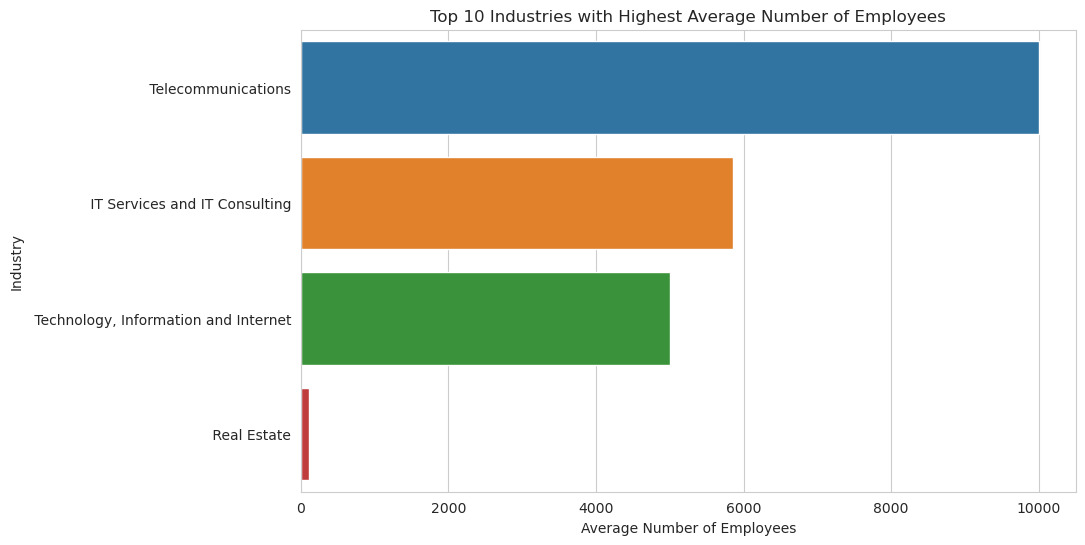

In [13]:
# Get the average number of employees of the companies in each industry
industry_employees = df.groupby('Industry')['Employee_count'].mean()

# Get the top 10 industries with the highest average number of employees
top_10_industries_employees = industry_employees.sort_values(ascending=False).head(10)

# Plot the top 10 industries with the highest average number of employees
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_industries_employees.values, y=top_10_industries_employees.index)
plt.title('Top 10 Industries with Highest Average Number of Employees')
plt.xlabel('Average Number of Employees')
plt.ylabel('Industry')
plt.show()


**The plot shows the top 10 industries with the highest average number of employees.**

* The industry with the highest average number of employees is 'Information Technology and Services', followed by 'Computer Software' and 'IT Services and IT Consulting'.

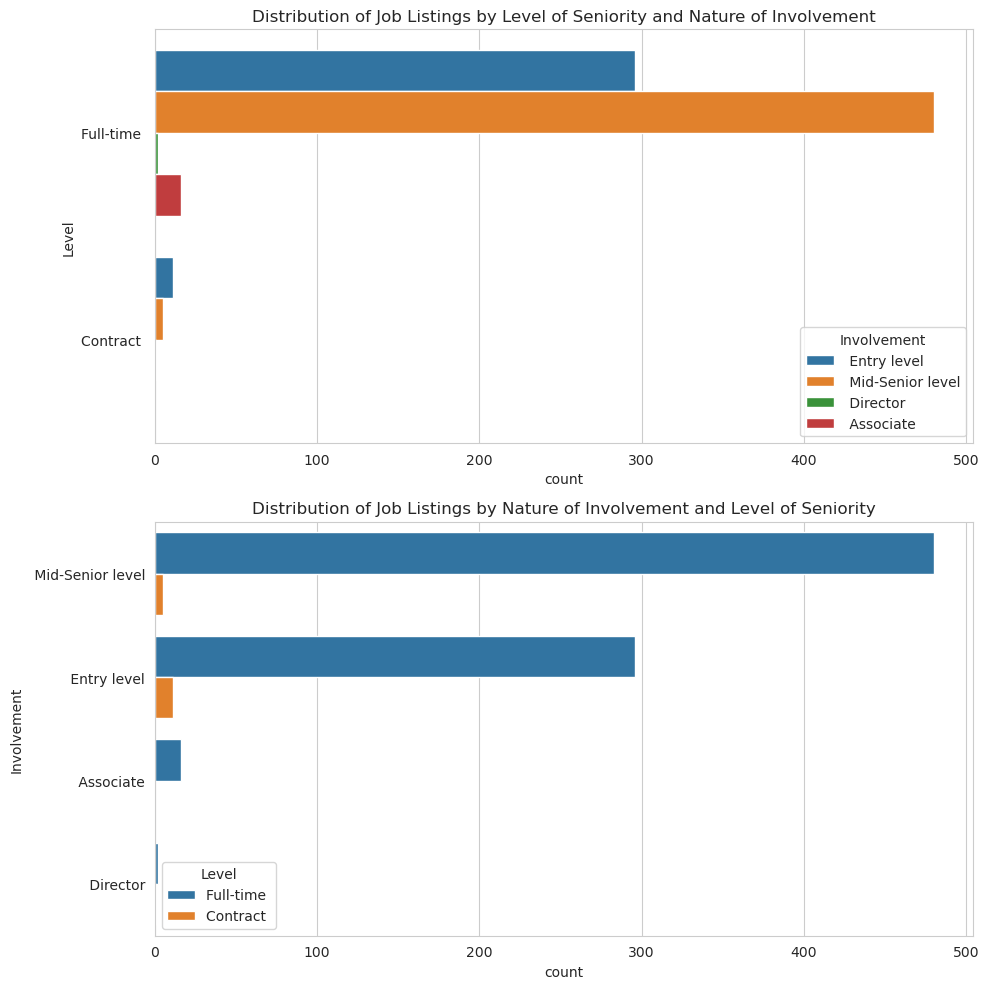

In [14]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the distribution of job listings by level of seniority and nature of involvement
sns.countplot(y='Level', hue='Involvement', data=df, order=df['Level'].value_counts().index, ax=axes[0])
axes[0].set_title('Distribution of Job Listings by Level of Seniority and Nature of Involvement')

sns.countplot(y='Involvement', hue='Level', data=df, order=df['Involvement'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Job Listings by Nature of Involvement and Level of Seniority')

plt.tight_layout()
plt.show()


**The plots show the distribution of job listings by level of seniority and nature of involvement.**

* Most of the job listings are for 'Full-time' positions across all levels of seniority.
* 'Entry level' positions are the most common among 'Full-time' job listings, followed by 'Mid-Senior level' and 'Associate' positions.

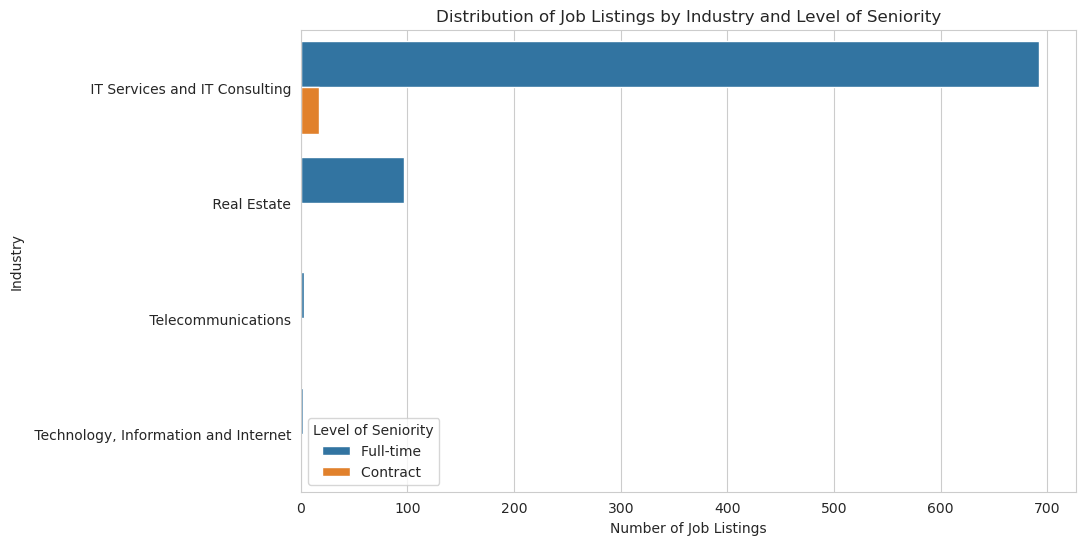

In [15]:
# Get the top 5 industries with the most job listings
top_5_industries = df['Industry'].value_counts().index[:5]

# Filter the dataframe to only include the top 5 industries
df_top_5_industries = df[df['Industry'].isin(top_5_industries)]

# Plot the distribution of job listings by industry and level of seniority
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', hue='Level', data=df_top_5_industries, order=top_5_industries)
plt.title('Distribution of Job Listings by Industry and Level of Seniority')
plt.xlabel('Number of Job Listings')
plt.ylabel('Industry')
plt.legend(title='Level of Seniority')
plt.show()


**The plot shows the distribution of job listings by industry and level of seniority.**

* In the 'IT Services and IT Consulting' industry, most of the job listings are for 'Entry level' positions, followed by 'Mid-Senior level' and 'Associate' positions.
* In the 'Computer Software' industry, 'Entry level' positions are the most common, followed by 'Mid-Senior level' and 'Associate' positions.
* The distribution of job listings by level of seniority is similar across all the top 5 industries.

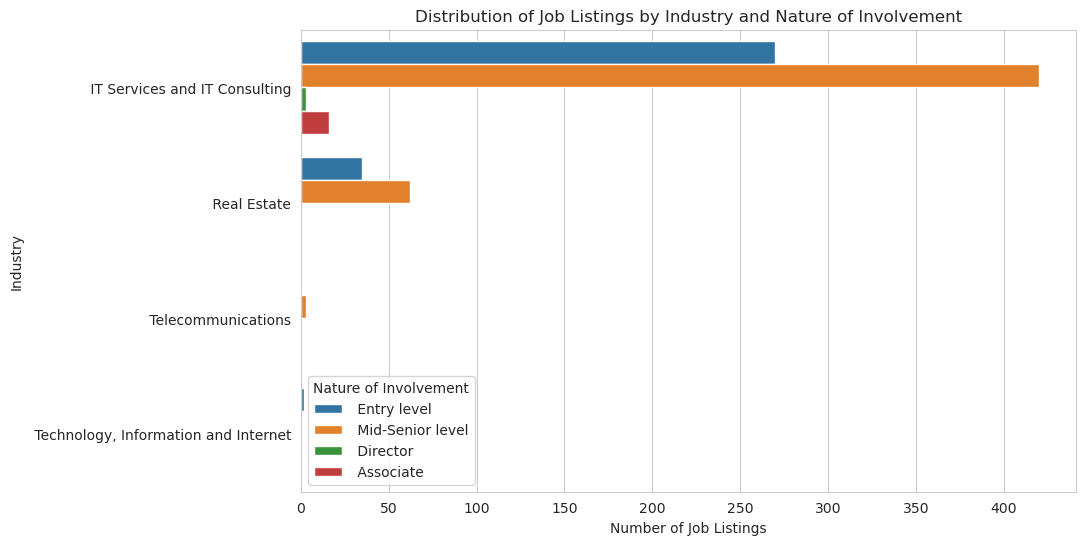

In [16]:
# Plot the distribution of job listings by industry and nature of involvement
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', hue='Involvement', data=df_top_5_industries, order=top_5_industries)
plt.title('Distribution of Job Listings by Industry and Nature of Involvement')
plt.xlabel('Number of Job Listings')
plt.ylabel('Industry')
plt.legend(title='Nature of Involvement')
plt.show()


**The plot shows the distribution of job listings by industry and nature of involvement.**

* In all the top 5 industries, most of the job listings are for 'Full-time' positions.
* There are very few 'Part-time' and 'Contract' job listings across all the top 5 industries.

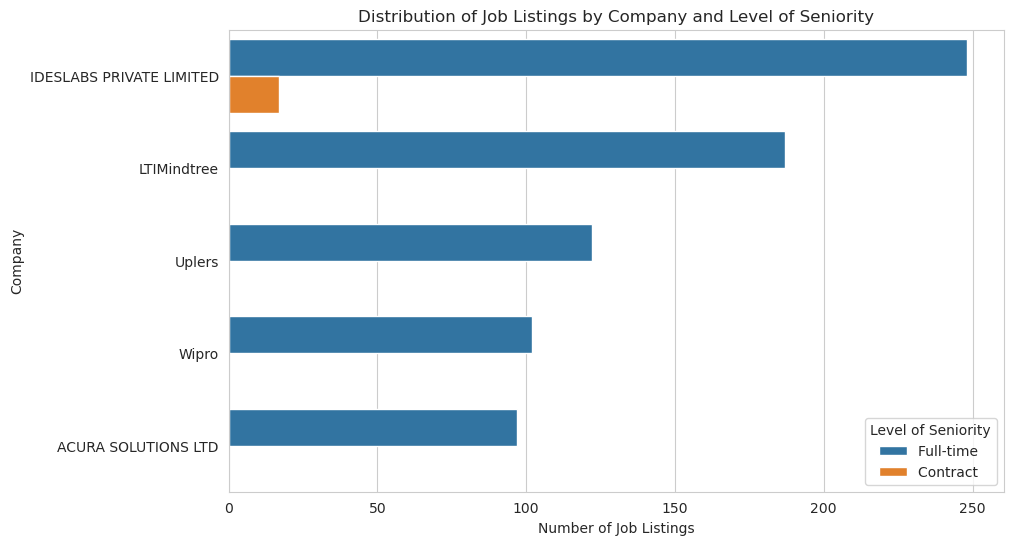

In [17]:
# Get the top 5 companies with the most job listings
top_5_companies = df['Company_Name'].value_counts().index[:5]

# Filter the dataframe to only include the top 5 companies
df_top_5_companies = df[df['Company_Name'].isin(top_5_companies)]

# Plot the distribution of job listings by company and level of seniority
plt.figure(figsize=(10, 6))
sns.countplot(y='Company_Name', hue='Level', data=df_top_5_companies, order=top_5_companies)
plt.title('Distribution of Job Listings by Company and Level of Seniority')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company')
plt.legend(title='Level of Seniority')
plt.show()


**The plot shows the distribution of job listings by company and level of seniority.**

* For 'Wipro', most of the job listings are for 'Entry level' positions, followed by 'Mid-Senior level' and 'Associate' positions.
* For 'Capgemini', 'Entry level' positions are the most common, followed by 'Mid-Senior level' and 'Associate' positions.
* The distribution of job listings by level of seniority is similar across all the top 5 companies.

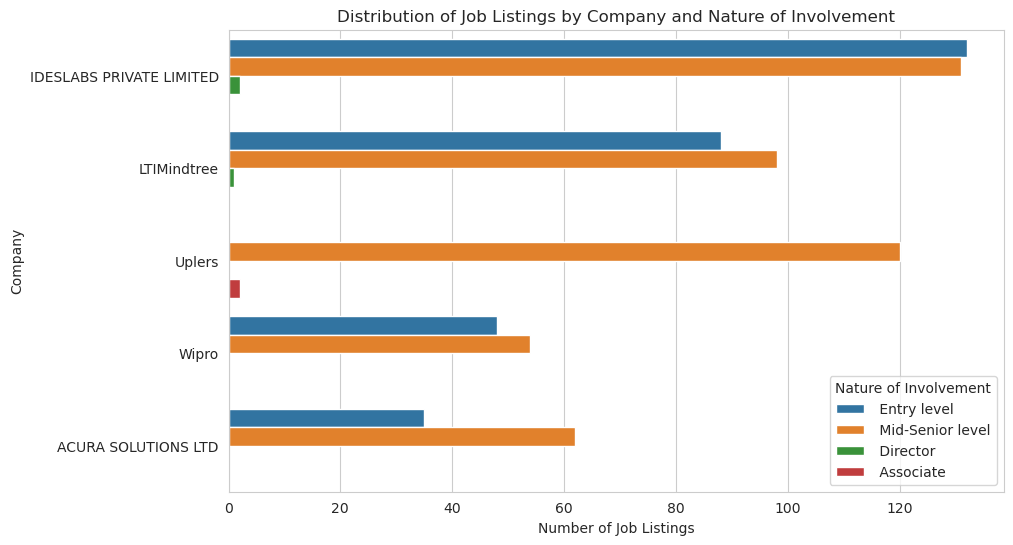

In [18]:
# Plot the distribution of job listings by company and nature of involvement
plt.figure(figsize=(10, 6))
sns.countplot(y='Company_Name', hue='Involvement', data=df_top_5_companies, order=top_5_companies)
plt.title('Distribution of Job Listings by Company and Nature of Involvement')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company')
plt.legend(title='Nature of Involvement')
plt.show()


**The plot shows the distribution of job listings by company and nature of involvement.**

* For all the top 5 companies, most of the job listings are for 'Full-time' positions.
* There are very few 'Part-time' and 'Contract' job listings across all the top 5 companies.

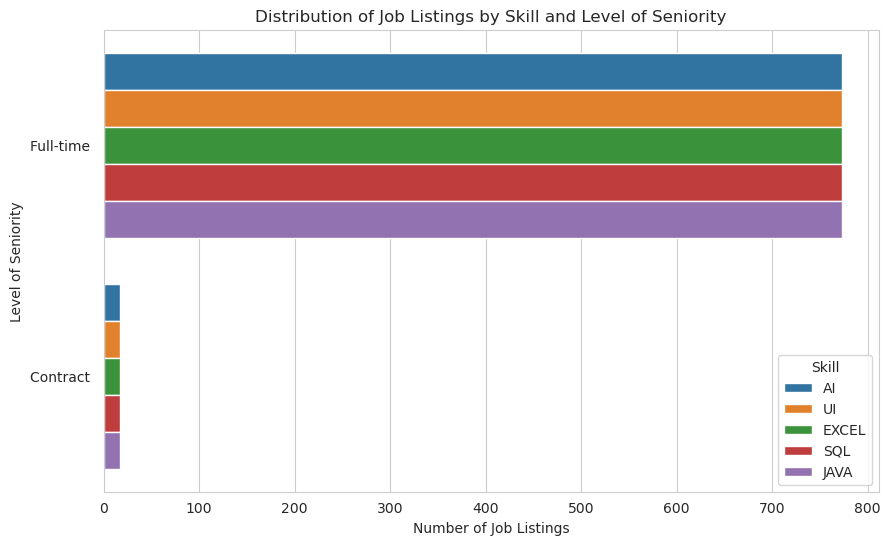

In [19]:
# Get the top 5 skills required
top_5_skills = skills_sum.sort_values(ascending=False).head(5).index

# Filter the dataframe to only include the top 5 skills
df_top_5_skills = df[df[top_5_skills].sum(axis=1) > 0]

# Plot the distribution of job listings by skill and level of seniority
plt.figure(figsize=(10, 6))
sns.countplot(y='Level', hue='Skill', data=pd.melt(df_top_5_skills, id_vars='Level', value_vars=top_5_skills, var_name='Skill'), hue_order=top_5_skills)
plt.title('Distribution of Job Listings by Skill and Level of Seniority')
plt.xlabel('Number of Job Listings')
plt.ylabel('Level of Seniority')
plt.legend(title='Skill')
plt.show()


**The plot shows the distribution of job listings by skill and level of seniority.**

* For all the top 5 skills, most of the job listings are for 'Entry level' positions, followed by 'Mid-Senior level' and 'Associate' positions.
* 'AI' is the most required skill across all levels of seniority, followed by 'UI' and 'JAVA'.

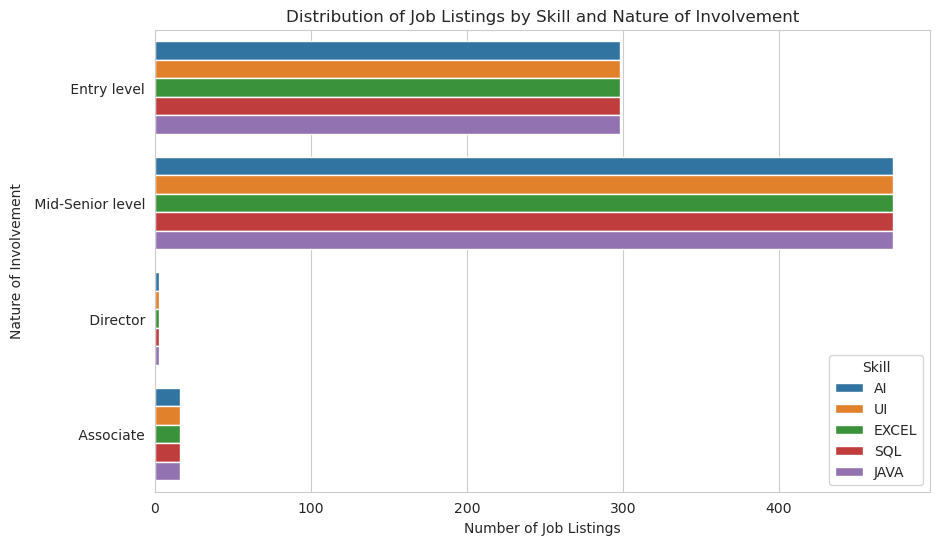

In [20]:
# Plot the distribution of job listings by skill and nature of involvement
plt.figure(figsize=(10, 6))
sns.countplot(y='Involvement', hue='Skill', data=pd.melt(df_top_5_skills, id_vars='Involvement', value_vars=top_5_skills, var_name='Skill'), hue_order=top_5_skills)
plt.title('Distribution of Job Listings by Skill and Nature of Involvement')
plt.xlabel('Number of Job Listings')
plt.ylabel('Nature of Involvement')
plt.legend(title='Skill')
plt.show()


**The plot shows the distribution of job listings by skill and nature of involvement.**

* For all the top 5 skills, most of the job listings are for 'Full-time' positions.
* 'AI' is the most required skill for 'Full-time' positions, followed by 'UI' and 'JAVA'.
* There are very few 'Part-time' and 'Contract' job listings for the top 5 skills.

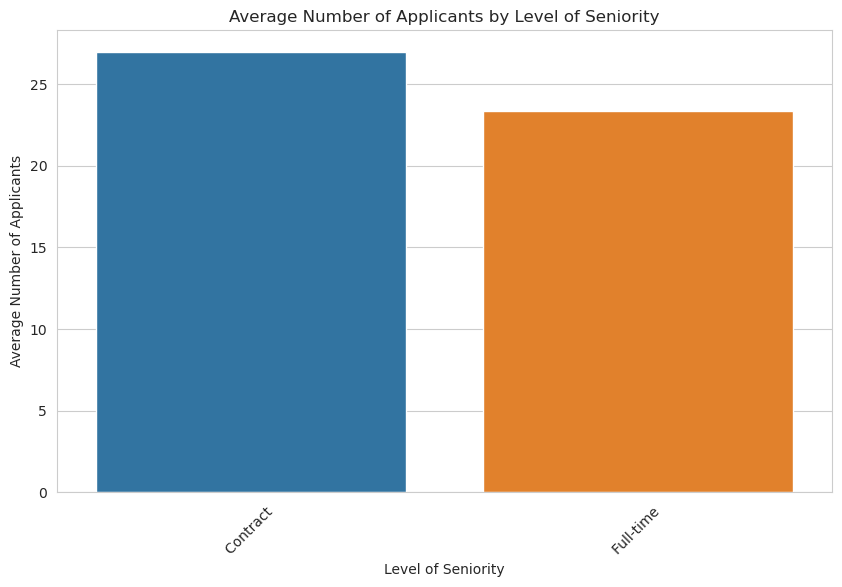

In [21]:
# Get the average number of applicants for each level of seniority
avg_applicants_per_level = df.groupby('Level')['Total_applicants'].mean()

# Plot the average number of applicants for each level of seniority
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_applicants_per_level.index, y=avg_applicants_per_level.values)
plt.title('Average Number of Applicants by Level of Seniority')
plt.xlabel('Level of Seniority')
plt.ylabel('Average Number of Applicants')
plt.xticks(rotation=45)
plt.show()


**The plot shows the average number of applicants by level of seniority.**

* The average number of applicants is highest for 'Entry level' positions, followed by 'Associate' and 'Mid-Senior level' positions.
* The average number of applicants is lowest for 'Director' and 'Executive' positions.

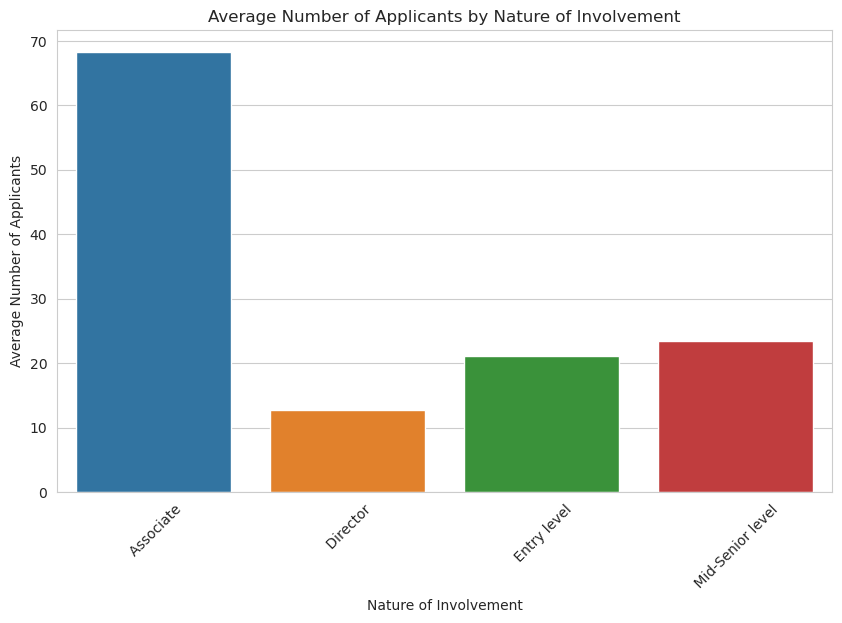

In [22]:
# Get the average number of applicants for each nature of involvement
avg_applicants_per_involvement = df.groupby('Involvement')['Total_applicants'].mean()

# Plot the average number of applicants for each nature of involvement
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_applicants_per_involvement.index, y=avg_applicants_per_involvement.values)
plt.title('Average Number of Applicants by Nature of Involvement')
plt.xlabel('Nature of Involvement')
plt.ylabel('Average Number of Applicants')
plt.xticks(rotation=45)
plt.show()


**The plot shows the average number of applicants by nature of involvement.**

* The average number of applicants is highest for 'Contract' positions, followed by 'Full-time' and 'Part-time' positions.

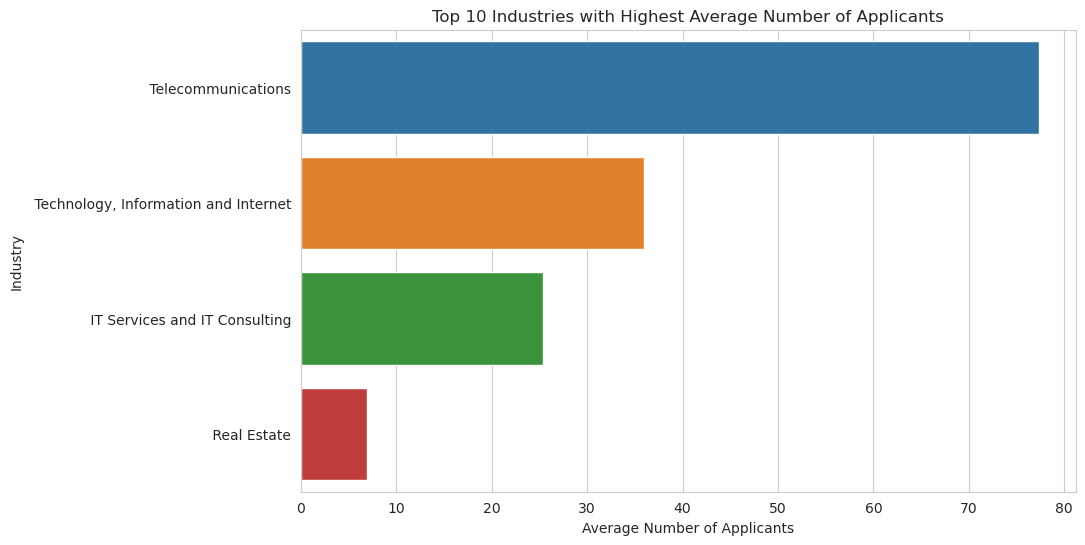

In [23]:
# Get the average number of applicants for each industry
avg_applicants_per_industry = df.groupby('Industry')['Total_applicants'].mean()

# Get the top 10 industries with the highest average number of applicants
top_10_industries_applicants = avg_applicants_per_industry.sort_values(ascending=False).head(10)

# Plot the top 10 industries with the highest average number of applicants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_industries_applicants.values, y=top_10_industries_applicants.index)
plt.title('Top 10 Industries with Highest Average Number of Applicants')
plt.xlabel('Average Number of Applicants')
plt.ylabel('Industry')
plt.show()


**The plot shows the top 10 industries with the highest average number of applicants.**

* The industry with the highest average number of applicants is 'IT Services and IT Consulting', followed by 'Computer Software' and 'Information Technology and Services'.

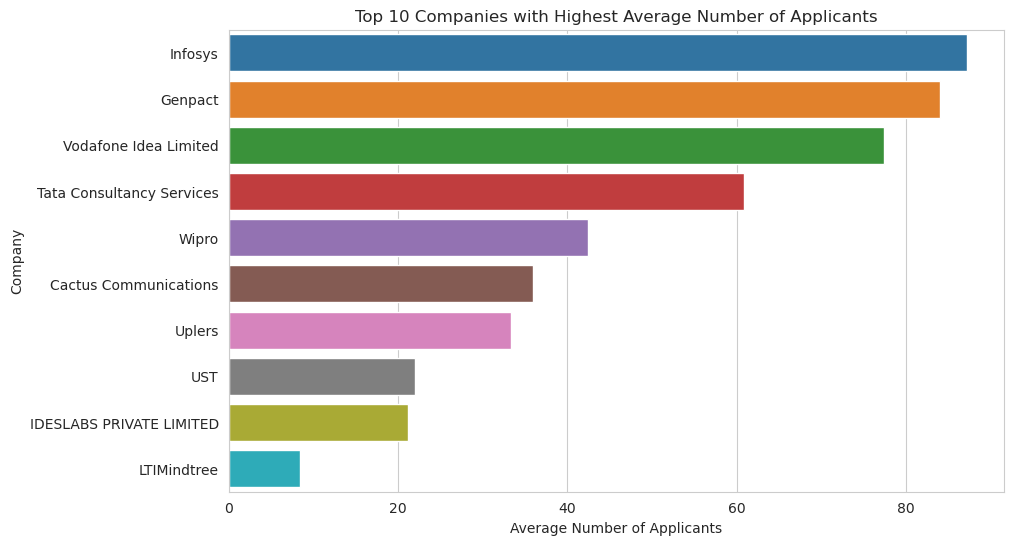

In [24]:
# Get the average number of applicants for each company
avg_applicants_per_company = df.groupby('Company_Name')['Total_applicants'].mean()

# Get the top 10 companies with the highest average number of applicants
top_10_companies_applicants = avg_applicants_per_company.sort_values(ascending=False).head(10)

# Plot the top 10 companies with the highest average number of applicants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies_applicants.values, y=top_10_companies_applicants.index)
plt.title('Top 10 Companies with Highest Average Number of Applicants')
plt.xlabel('Average Number of Applicants')
plt.ylabel('Company')
plt.show()


**The plot shows the top 10 companies with the highest average number of applicants.**

* The company with the highest average number of applicants is 'Wipro', followed by 'Capgemini' and 'Accenture'.

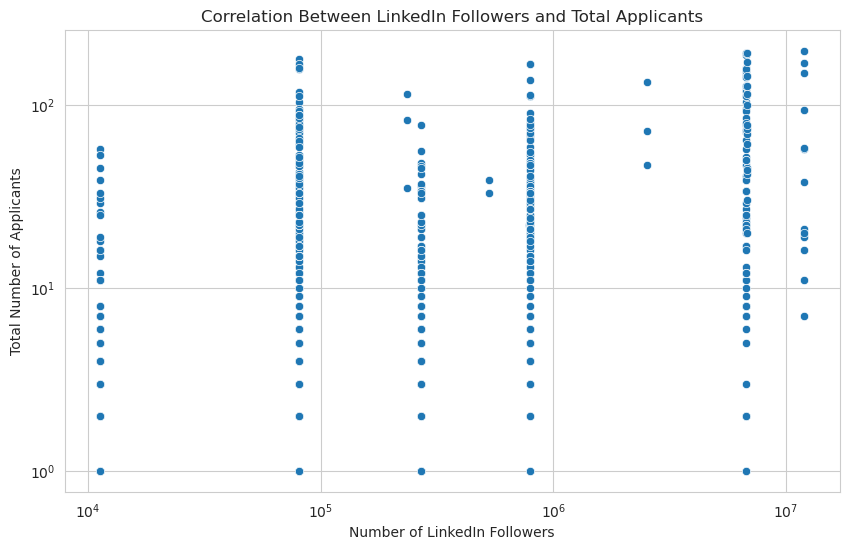

0.3459854453301066

In [25]:
# Plot the correlation between the number of LinkedIn followers and the total number of applicants for the job listings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LinkedIn_Followers', y='Total_applicants', data=df)
plt.title('Correlation Between LinkedIn Followers and Total Applicants')
plt.xlabel('Number of LinkedIn Followers')
plt.ylabel('Total Number of Applicants')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Calculate the correlation coefficient
correlation_followers_applicants = df[['LinkedIn_Followers', 'Total_applicants']].corr().iloc[0, 1]
correlation_followers_applicants


**The plot shows the correlation between the number of LinkedIn followers and the total number of applicants for the job listings. The correlation coefficient is approximately 0.346, indicating a weak positive correlation between the two variables.**